In [47]:
import pandas as pd
import numpy as np

In [48]:
data_wig20 = pd.read_csv("../../data/wig20_2005.csv")
data_peo = pd.read_csv("../../data/peo_2005.csv")

In [49]:
data_peo['Zwrot'] = data_peo['Zamkniecie'].pct_change()
data_wig20['Zwrot'] = data_wig20['Zamkniecie'].pct_change()

In [50]:
data_wig20['Data'] = pd.to_datetime(data_wig20['Data'])
data_peo['Data'] = pd.to_datetime(data_peo['Data'])

In [51]:
data_wig20.set_index('Data', inplace=True)
data_peo.set_index('Data', inplace=True)

In [52]:
window_length = 90

In [53]:
rolling_betas = [np.nan] * window_length 

In [54]:
for end_index in range(window_length, len(data_peo)):
    window_data_peo = data_peo.iloc[end_index-window_length:end_index]
    window_data_wig20 = data_wig20.iloc[end_index-window_length:end_index]

    avg_return_market = window_data_wig20['Zwrot'].mean()
    avg_return_asset = window_data_peo['Zwrot'].mean()

    sum_numerator = ((window_data_peo['Zwrot'] - avg_return_asset) * (window_data_wig20['Zwrot'] - avg_return_market)).sum()
    sum_denominator = ((window_data_wig20['Zwrot'] - avg_return_market) ** 2).sum()

    beta = sum_numerator / sum_denominator if sum_denominator != 0 else np.nan
    rolling_betas.append(beta)

In [55]:
rolling_betas = rolling_betas[:len(data_peo)]

In [56]:
data_peo['Beta'] = rolling_betas

In [57]:
data_peo.tail(10)

Otwarcie  Najwyzszy  Najnizszy  Zamkniecie       Wolumen  \
Data                                                                   
2023-12-14   133.822    134.361    132.024     133.822  9.347024e+05   
2023-12-15   133.552    133.732    130.137     131.350  2.337697e+06   
2023-12-18   131.215    135.978    131.035     134.855  7.367484e+05   
2023-12-19   134.361    137.012    133.642     135.574  6.410138e+05   
2023-12-20   135.709    137.057    133.013     134.361  6.812270e+05   
2023-12-21   133.732    137.057    133.597     136.023  5.728368e+05   
2023-12-22   134.810    136.428    133.911     136.068  2.158124e+05   
2023-12-27   135.889    138.135    135.664     137.731  4.614601e+05   
2023-12-28   138.225    138.405    136.742     137.327  2.646700e+05   
2023-12-29   137.776    138.046    135.709     136.653  2.384865e+05   

               Zwrot      Beta  
Data                            
2023-12-14  0.009155  1.462895  
2023-12-15 -0.018472  1.443871  
2023-12-18  0.026684  1.445478  
2023-12-19  0.005332  1.464103  
2023-12-20 -0.008947  1.464167  
2023-12-21  0.012370  1.458884  
2023-12-22  0.000331  1.464096  
2023-12-27  0.012222  1.464483  
2023-12-28 -0.002933  1.463784  
2023-12-29 -0.004908  1.461956

In [58]:
data_peo.to_csv("../../data/peo_2005_beta.csv", index=True)

In [59]:
start_date = data_peo.index[90]

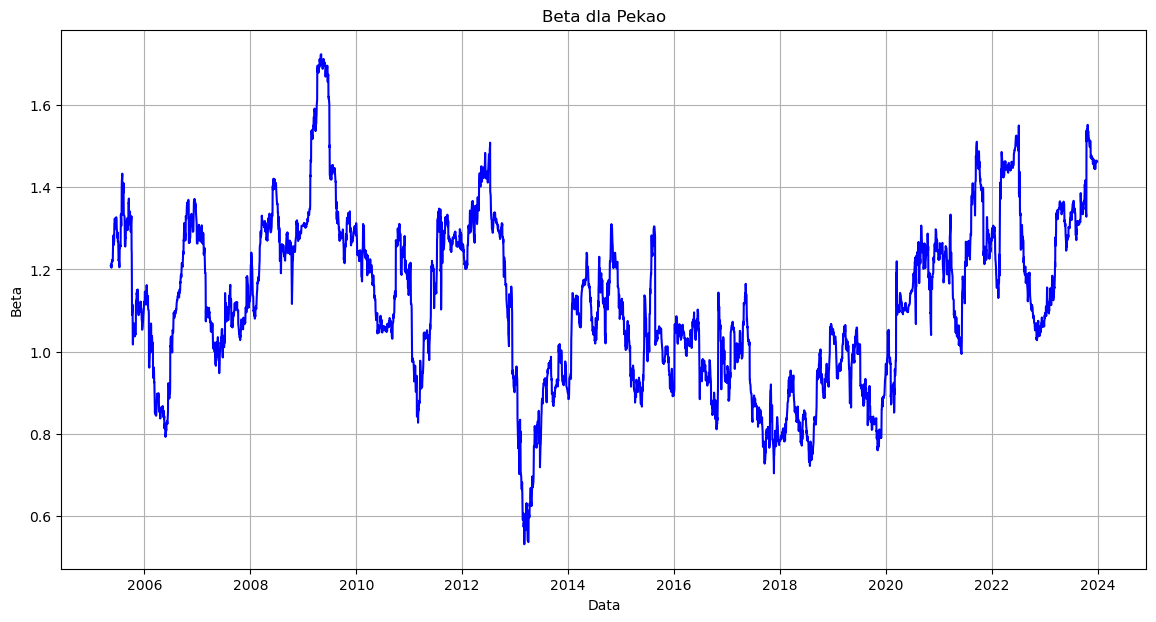

In [60]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 7))
plt.plot(data_peo.loc[start_date:].index, data_peo.loc[start_date:]['Beta'], color='blue')
plt.title('Beta dla Pekao')
plt.xlabel('Data')
plt.ylabel('Beta')
plt.grid(True)
plt.show()

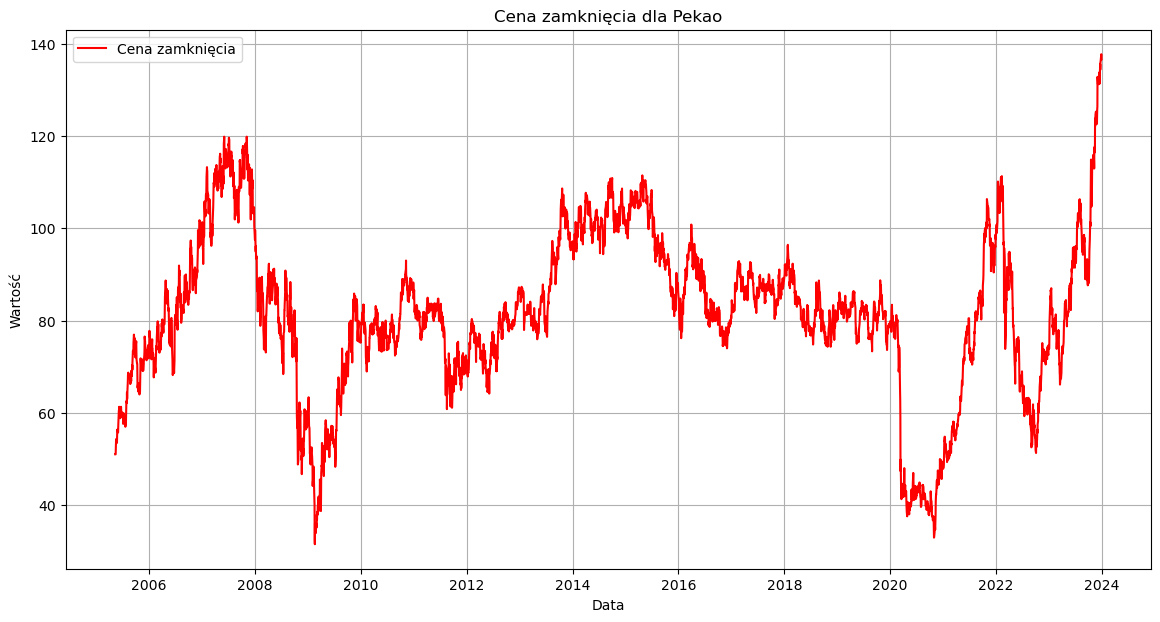

In [61]:
start_date = data_peo.index[90]

plt.figure(figsize=(14, 7))
plt.plot(data_peo.loc[start_date:].index, data_peo.loc[start_date:]['Zamkniecie'], color='red', label='Cena zamknięcia')
plt.title('Cena zamknięcia dla Pekao')
plt.xlabel('Data')
plt.ylabel('Wartość')
plt.grid(True)
plt.legend()
plt.show()

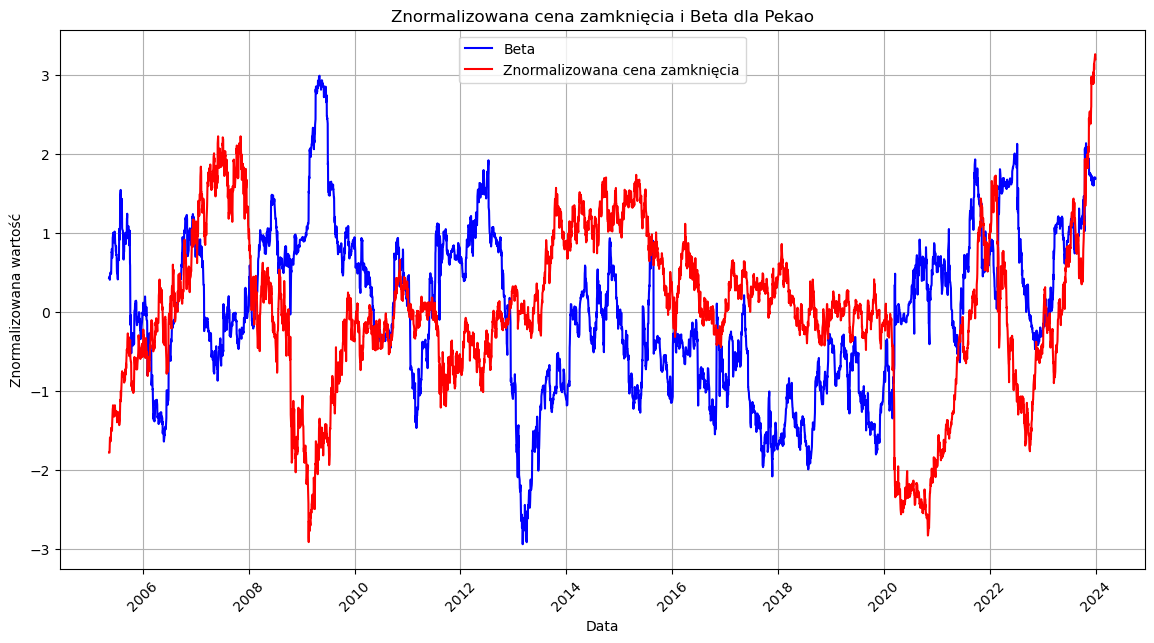

In [63]:
start_date = data_peo.index[90]

normalized_rolling_beta = (data_peo.loc[start_date:]['Beta'] - data_peo.loc[start_date:]['Beta'].mean()) / data_peo.loc[start_date:]['Beta'].std()
normalized_closing_price = (data_peo.loc[start_date:]['Zamkniecie'] - data_peo.loc[start_date:]['Zamkniecie'].mean()) / data_peo.loc[start_date:]['Zamkniecie'].std()

plt.figure(figsize=(14, 7))
plt.plot(data_peo.loc[start_date:].index, normalized_rolling_beta, color='blue', label='Beta')
plt.plot(data_peo.loc[start_date:].index, normalized_closing_price, color='red', label='Znormalizowana cena zamknięcia')
plt.title('Znormalizowana cena zamknięcia i Beta dla Pekao')
plt.xlabel('Data')
plt.ylabel('Znormalizowana wartość')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.show()